## Robot@Home 2 - Laser Scanner observations `v1.1`:PROPERTIES:



`R@H2 notebook series`



### R@H2 functions introduced in this notebook:



-   `rh.get_laser_scan(id)`
-   `get_scan_xy(laser_scan)`
-   `plot_scan(laser_scan)`



### Laser scanner observations



In the previous notebook we have been dealing with RGBD observations. Now it is
the turn of the Laser Scanner observations.



In [1]:
%matplotlib inline

import numpy as np
import os
import pandas as pd

from robotathome import RobotAtHome
from robotathome import logger, log, set_log_level
from robotathome import time_win2unixepoch, time_unixepoch2win
from robotathome import get_labeled_img, plot_labeled_img, plot_scan, get_scan_xy

In [1]:
log.set_log_level('INFO')  # SUCCESS is the default

my_rh_path = '~/WORKSPACE/R@H2-2.0.1'
my_rgbd_path = os.path.join(my_rh_path, 'files/rgbd')
my_scene_path = os.path.join(my_rh_path, 'files/scene')
my_wspc_path = '~/WORKSPACE'

try:
    rh = RobotAtHome(my_rh_path, my_rgbd_path, my_scene_path, my_wspc_path)
except:
    logger.error("Something was wrong")

2022-01-22 22:32:54.223 | SUCCESS  | robotathome.core.reader:__open_dataset:87 - Connection is established: rh.db

In [1]:
# The full dataset is returned by default
laser_obs = rh.get_sensor_observations('lsrscan')
logger.info(f"# Laser Scans set: {len(laser_obs)} observations with {len(laser_obs.columns)} fields")

2022-01-22 22:32:55.209 | INFO     | __main__:<module>:3 - # Laser Scans set: 39363 observations with 14 fields

Apart from the information included in each record,



In [1]:
laser_obs.info()

#+begin_example
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39363 entries, 0 to 39362
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  39363 non-null  int64  
 1   timestamp           39363 non-null  int64  
 2   home_session_id     39363 non-null  int64  
 3   home_subsession_id  39363 non-null  int64  
 4   home_id             39363 non-null  int64  
 5   room_id             39363 non-null  int64  
 6   sensor_id           39363 non-null  int64  
 7   sensor_name         39363 non-null  object 
 8   sensor_pose_x       39363 non-null  float64
 9   sensor_pose_y       39363 non-null  float64
 10  sensor_pose_z       39363 non-null  float64
 11  sensor_pose_yaw     39363 non-null  float64
 12  sensor_pose_pitch   39363 non-null  float64
 13  sensor_pose_roll    39363 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 4.2+ MB
#+end_example

you can get the laser scan corresponding to the observation



In [1]:
# For example, let's examine the first laser observation
id = 200000
laser_scan = rh.get_laser_scan(id)
laser_scan.info()

#+begin_example
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     682 non-null    int64  
 1   shot_id                682 non-null    int64  
 2   scan                   682 non-null    float64
 3   valid_scan             682 non-null    int64  
 4   sensor_observation_id  682 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 26.8 KB
#+end_example

The data frame for a laser observation,.i.e. for a given `id`, has 682 rows, one per
shot. Each shot is referenced by the shot<sub>id</sub> field whose values are in the range
[0, 681] and are sequentially ordered.

Note the other important fields, `scan` which is the distance measurement and
`valid_scan` which is a binary value indicating whether the shot is valid (1) or
not (0).



In [1]:
# To get a list with the shot values
# We can easily convert a column to a list
shot_list = laser_scan['scan'].values.tolist()
logger.info("\nShots column: \n{}\nShot list: \n{}...", laser_scan['scan'], shot_list[:5])

#+begin_example
2022-01-22 22:32:56.767 | INFO     | __main__:<module>:4 - 
Shots column: 
0      1.788
1      1.749
2      1.749
3      1.749
4      1.749
       ...  
677    1.099
678    1.099
679    0.539
680    0.537
681    0.531
Name: scan, Length: 682, dtype: float64
Shot list: 
[1.788, 1.749, 1.749, 1.749, 1.749]...
#+end_example

The laser scan dataframe has also important metadada that can be printed out



In [1]:
logger.info("\naperture    : {} radians \nmax_range   : {} meters\nno_of_shots : {}",
            laser_scan.aperture, laser_scan.max_range, laser_scan.no_of_shots )

2022-01-22 22:32:57.281 | INFO     | __main__:<module>:1 - 
aperture    : 4.1847 radians 
max_range   : 5.6 meters
no_of_shots : 682

So a distance measurement is done `no_of_shot` times with an angular distance of
`aperture/no_of_shots` radians between them.

Those parameters allow to easily compute x, y coordinates, nevertheless there is
a function to get them



In [1]:
xy = get_scan_xy(laser_scan)
logger.info("\n (x,y) laser scan coordinates: \n{}", xy)

#+begin_example
2022-01-22 22:32:57.971 | INFO     | __main__:<module>:2 - 
 (x,y) laser scan coordinates: 
                x         y
shot_id                    
0        1.788000  0.000000
1        1.748967  0.010732
2        1.748868  0.021463
3        1.748704  0.032193
4        1.748473  0.042923
...           ...       ...
677     -0.582254 -0.932084
678     -0.576524 -0.935640
679     -0.279933 -0.460607
680     -0.276073 -0.460600
681     -0.270189 -0.457120

[682 rows x 2 columns]
#+end_example

Finally you can plot the scan



# Out[23]:

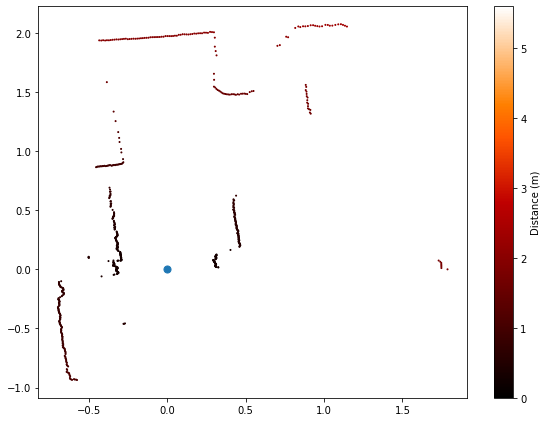

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.6, 7.2]
plot_scan(laser_scan)